In [72]:
from misc import *
import matplotlib.pyplot as plt
from tqdm import tqdm 
periods = 1000
ppp = 1000

states = {}
states_euler = {}
windows = np.concatenate([(10**k)*np.arange(2,11) for k in range(3)])
rppps = [1] #+ list(windows)
for rppp in rppps:
    states[rppp], covs, signals, params, times = load_data(path=get_def_path()+"rppp{}/".format(rppp), periods=periods, ppp=ppp, method="rossler")
    #states_euler[rppp], covs_euler, signals_euler, params_euler, times_euler = load_data(path=get_def_path()+"rppp{}/".format(rppp), 
     #                                                                              periods=periods, ppp=ppp, method="euler")

Traj loaded 
ppp: 1000
periods: 1000
method: rossler
itraj: 1


Text(0.5, 0.98, 'covariances evo')

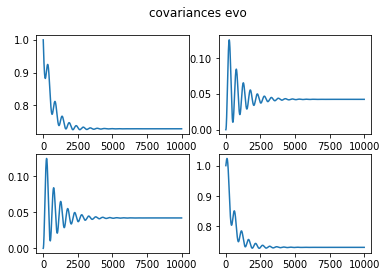

In [108]:
for i in range(2):
    for k in range(2):
        ax = plt.subplot2grid((2,2),(i,k))
        ax.plot(covs[:,i,k][:10000])
plt.suptitle("covariances evo")
        

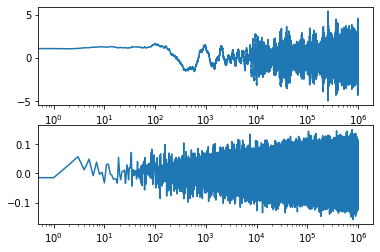

In [110]:
a=0
b=-1#00000
ax=plt.subplot(211)
plt.plot(states[1][:,0][a:b])
ax.set_xscale("log")
ax=plt.subplot(212)
plt.plot(signals[:,0][a:b])
ax.set_xscale("log")


In [96]:
itraj = 1
method = "rossler"
path_landscape=get_def_path()+"{}periods/{}ppp/{}/cost_landscape/{}".format(periods,ppp,itraj,method)
loss = np.load(path_landscape+"losses.npy")
omegas = np.load(path_landscape+"omegas.npy")
cuts_final_time = np.load(path_landscape+"cuts.npy")

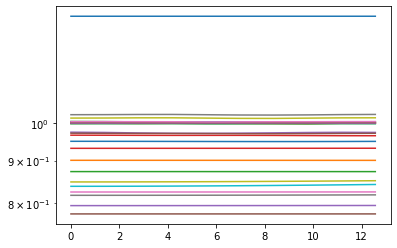

In [98]:
ax = plt.subplot(111)
for k, cut in enumerate(cuts_final_time[10:]):
    ax.plot(omegas, loss[:,k], label=times[cut])
ax.set_yscale("log")

Text(0.5, 0, 'omega')

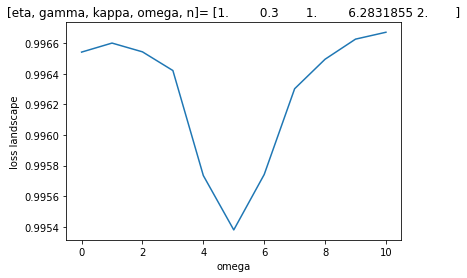

In [104]:
plt.title("[eta,  gamma, kappa, omega, n]= "+str( params))
plt.plot(loss[:,-1])
plt.ylabel("loss landscape")
plt.xlabel("omega")

In [38]:
plt.figure(figsize=(20,7))
colors = plt.get_cmap("rainbow")
ax = plt.subplot2grid((1,1),(0,0))
for ind,p in enumerate(landscape.values()):
    plt.plot(omegas,p, color=colors(np.linspace(0,1,len(landscape)))[ind], marker='.', label="{}".format(int(np.round(cut_series[ind]+1,0))),linewidth=3)
plt.legend()
plt.xlabel(r'$\tilde{\omega}$',size=30)
plt.ylabel(r'$C(\omega, \tilde{\omega})$',size=30)

array([[1.34474749, 0.90092406, 0.87308237, 0.93143542, 0.79426201,
        0.77614991, 0.82490492, 0.81735078, 0.84830991, 0.83807515,
        0.94979749, 1.00037014, 1.00354243, 0.96609752, 0.97420145,
        0.97146387, 0.99960052, 1.02271111, 1.01311435, 0.99785656,
        1.00257137, 0.99825941, 0.99770649],
       [1.34474786, 0.90092219, 0.87308164, 0.93143832, 0.79426573,
        0.77614983, 0.8249068 , 0.81736339, 0.84834768, 0.83813105,
        0.94975641, 1.00031949, 1.00325717, 0.96594664, 0.97349424,
        0.97121734, 0.99958852, 1.02286636, 1.0133164 , 0.99783208,
        1.00272601, 0.99838789, 0.99785223],
       [1.34474898, 0.90091657, 0.87307947, 0.93144703, 0.79427688,
        0.77614963, 0.8249125 , 0.81740125, 0.84846075, 0.83829825,
        0.94964209, 1.00019776, 1.00254694, 0.9656728 , 0.97213304,
        0.97090372, 0.99979642, 1.0233379 , 1.01387805, 0.99794004,
        1.00242674, 0.9982404 , 0.9976879 ],
       [1.34475083, 0.90090721, 0.87307585, 0.931